In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

In [8]:
def twelve_core_coupling_matrix(w,v):
    h = np.array([[0,w,0,0,0,0,0,0,0,0,0,0],
                 [w,0,v,0,0,0,0,0,0,0,0,0],
                 [0,v,0,w,0,0,0,0,0,0,0,0],
                 [0,0,w,0,v,0,0,0,0,0,0,0],
                 [0,0,0,v,0,w,0,0,0,0,0,0],
                 [0,0,0,0,w,0,v,0,0,0,0,0],
                 [0,0,0,0,0,v,0,w,0,0,0,0],
                 [0,0,0,0,0,0,w,0,v,0,0,0],
                 [0,0,0,0,0,0,0,v,0,w,0,0],
                 [0,0,0,0,0,0,0,0,w,0,v,0],
                 [0,0,0,0,0,0,0,0,0,v,0,w],
                 [0,0,0,0,0,0,0,0,0,0,w,0]])    
    return h

def calc_id_on_chain(a_vector):
    intensities = a_vector*np.conjugate(a_vector)/np.vdot(a_vector, a_vector)
    a_ints = intensities[::2]
    b_ints = intensities[1::2]
    int_diff = a_ints - b_ints
    scaled_diff_list = int_diff*np.arange(-3,3)
    I_d = np.sum(scaled_diff_list)
    return I_d

In [9]:
initial_excitation = np.zeros(12)
initial_excitation[6] = 1.0

print(initial_excitation)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [10]:
def take_steps(n, init_vec, coupling_matrix, step_size):
    for i in range(n):
        # init_vec = linalg.expm(-1.0j*step_size*coupling_matrix)@init_vec
        init_vec = init_vec - 1.0j*step_size*coupling_matrix@init_vec - (step_size**2)/2  * coupling_matrix@coupling_matrix@init_vec
        # print('Step {}: '.format(i) + str(init_vec))
    
    return init_vec

In [11]:
coupling_even = twelve_core_coupling_matrix(0.333,0.333)
coupling_top = twelve_core_coupling_matrix(0.333,0.666)
coupling_triv = twelve_core_coupling_matrix(0.666,0.333)


In [16]:
xlist= np.arange(100)
id_list_even = []
id_list_top = []
id_list_triv = []
for x in xlist:
    final_vec_even = take_steps(x, initial_excitation, coupling_even, 0.10)
    final_vec_top = take_steps(x, initial_excitation, coupling_top, 0.10)
    final_vec_triv = take_steps(x, initial_excitation, coupling_triv, 0.10)
    id_list_even.append(calc_id_on_chain(final_vec_even))
    id_list_top.append(calc_id_on_chain(final_vec_top))
    id_list_triv.append(calc_id_on_chain(final_vec_triv))


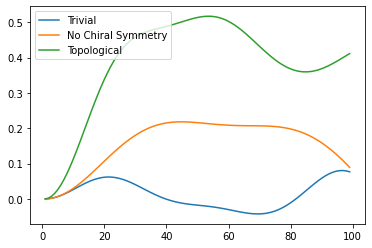

In [17]:

cum_avg_triv = []
cum_avg_even = []
cum_avg_top = []
for n in xlist:
    cum_avg_triv.append(np.mean(id_list_triv[:n]))
    cum_avg_even.append(np.mean(id_list_even[:n]))
    cum_avg_top.append(np.mean(id_list_top[:n]))
plt.plot(xlist, cum_avg_triv, label='Trivial')
plt.plot(xlist, cum_avg_even, label='No Chiral Symmetry')
plt.plot(xlist, cum_avg_top, label='Topological')
plt.legend()


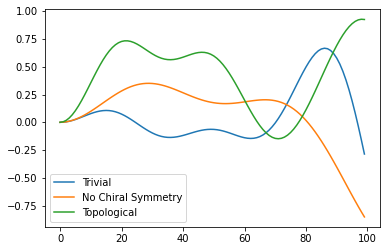

In [18]:
plt.plot(xlist, id_list_triv, label='Trivial')
plt.plot(xlist, id_list_even, label='No Chiral Symmetry')
plt.plot(xlist, id_list_top, label='Topological')
plt.legend()
